In [42]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import pickle
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
links = ['https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SAN+JOSE&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SANTA+CLARA&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SUNNYVALE&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=MOUNTAIN+VIEW&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=CUPERTINO&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=MENLO+PARK&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=PALO+ALTO&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=REDWOOD+CITY&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SAN+MATEO&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SAN+FRANCISCO&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SEATTLE&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=REDMOND&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SANTA+MONICA&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=LOS+ANGELES&year=All+Years',
         'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=AUSTIN&year=All+Years',
         'https://h1bdata.info/index.php?em=amazon&job=Data+Scientist+I&city=&year=All+Years'
        ]

# Scrape table data from each of the above links and store in a list
jobs_list = []
for link in links:
    page_link = link
    page_response = requests.get(page_link, timeout=1000)
    page_content = BeautifulSoup(page_response.content, 'lxml')

    for row in page_content.find_all('tr')[1:]:
        row_data = []
        for i in row:
            row_data.append(i.text)
        jobs_list.append(row_data)

In [8]:
# Put everything into dataframes for easier processing
ds_jobs_df = pd.DataFrame()
ds_jobs_df['company'] = [i[0] for i in jobs_list]
ds_jobs_df['title'] = [i[1] for i in jobs_list]

ds_jobs_df['salary'] = [i[2].replace(',','') for i in jobs_list]
ds_jobs_df['salary'] = ds_jobs_df['salary'].astype(float)

ds_jobs_df['location'] = [i[3] for i in jobs_list]

ds_jobs_df['date'] = [i[4] for i in jobs_list]
ds_jobs_df['date'] = pd.to_datetime(ds_jobs_df['date'])
ds_jobs_df['year'] = [i.year for i in ds_jobs_df['date']]

# Drop pre 2014 data (very few observations pre 2014)
ds_jobs_df.drop(ds_jobs_df[ds_jobs_df['year']<2014].index, axis=0, inplace=True)

# Drop salaries over $1,000,000
ds_jobs_df.drop(ds_jobs_df[ds_jobs_df['salary']>1000000].index, axis=0, inplace=True)

# Sort by company and year
ds_jobs_df.sort_values(by=['year','company'], inplace=True, ascending=True)

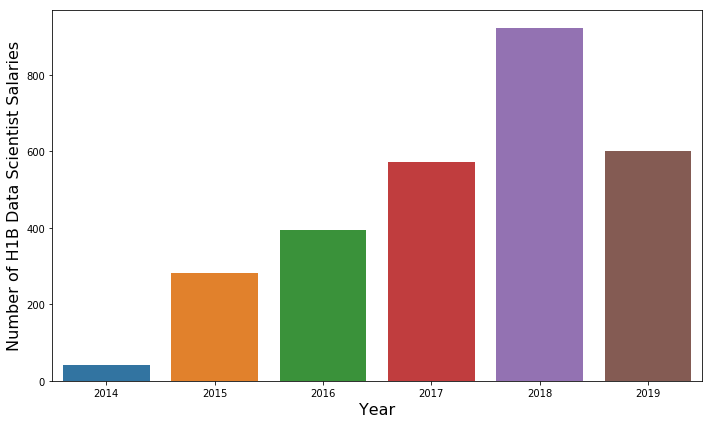

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=ds_jobs_df['year'].value_counts().sort_index().index, 
                 y=ds_jobs_df['year'].value_counts().sort_index().values)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Number of H1B Data Scientist Salaries",fontsize=16)
plt.tight_layout()
plt.savefig(fname='num_jobs', dpi=150)

In [37]:
ds_jobs_df['salary'].median()

120000.0

In [35]:
median_salary

,year,salary
0,2014,120250.0
1,2015,115000.0
2,2016,115000.0
3,2017,119642.0
4,2018,125000.0
5,2019,119850.0


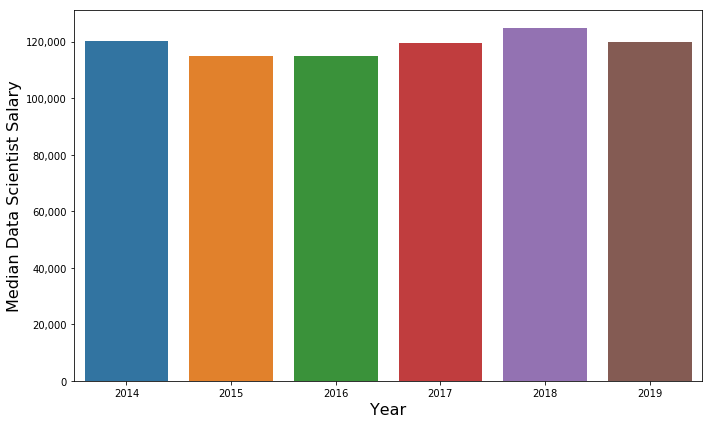

In [45]:
median_salary = ds_jobs_df.groupby(by=['year']).median().reset_index()

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=median_salary['year'], 
                 y=median_salary['salary'])
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Median Data Scientist Salary",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig(fname='median_salary', dpi=150)

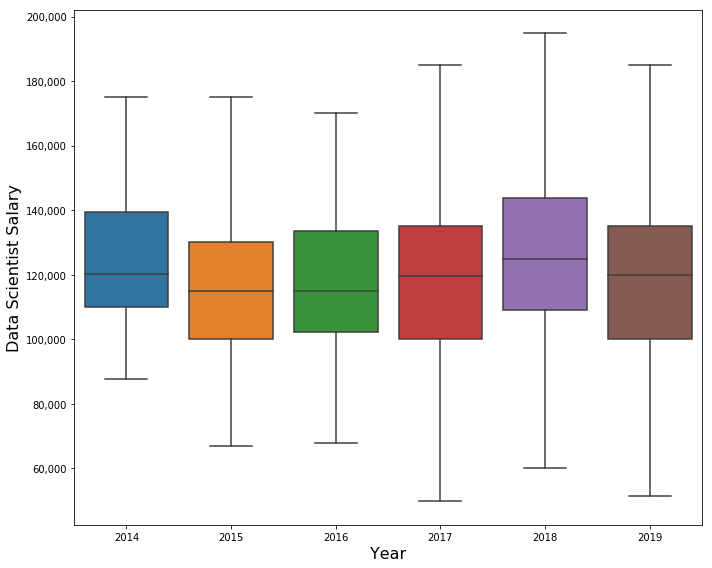

In [65]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='year', y='salary', data=ds_jobs_df, showfliers=False);
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Data Scientist Salary",fontsize=16)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.savefig(fname='salary_box', dpi=150)

In [70]:
print('All 25th perctile: ' + str(ds_jobs_df['salary'].quantile(0.25)))
print('All 50th perctile: ' + str(ds_jobs_df['salary'].quantile(0.50)))
print('All 75th perctile: ' + str(ds_jobs_df['salary'].quantile(0.75)))

All 25th perctile: 102600.0
All 50th perctile: 120000.0
All 75th perctile: 135475.5


In [71]:
print('2015 25th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']==2015]['salary'].quantile(0.25)))
print('2015 50th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']==2015]['salary'].quantile(0.50)))
print('2015 75th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']==2015]['salary'].quantile(0.75)))

2015 25th perctile: 100000.0
2015 50th perctile: 115000.0
2015 75th perctile: 130000.0


In [74]:
print('2019 25th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']>=2019]['salary'].quantile(0.25)))
print('2019 50th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']>=2019]['salary'].quantile(0.50)))
print('2019 75th perctile: ' + str(ds_jobs_df[ds_jobs_df['year']>=2019]['salary'].quantile(0.75)))

2019 25th perctile: 100000.0
2019 50th perctile: 119850.0
2019 75th perctile: 135000.0


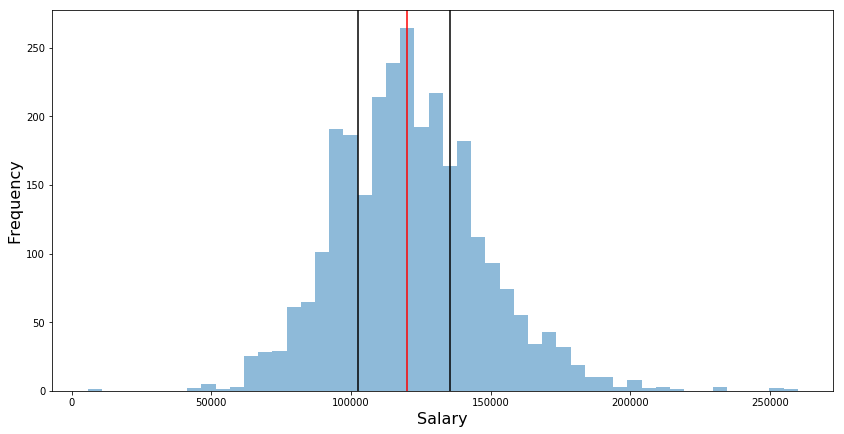

In [61]:
# Histogram of salaries
fig, ax = plt.subplots(figsize=(14,7))
ax = plt.hist(ds_jobs_df['salary'], bins=50, alpha=0.5)
plt.axvline(ds_jobs_df['salary'].quantile(0.25), c='black')
plt.axvline(ds_jobs_df['salary'].quantile(0.50), c='red')
plt.axvline(ds_jobs_df['salary'].quantile(0.75), c='black')

plt.xlabel('Salary',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

plt.savefig(fname='salary_hist', dpi=150)
plt.show()

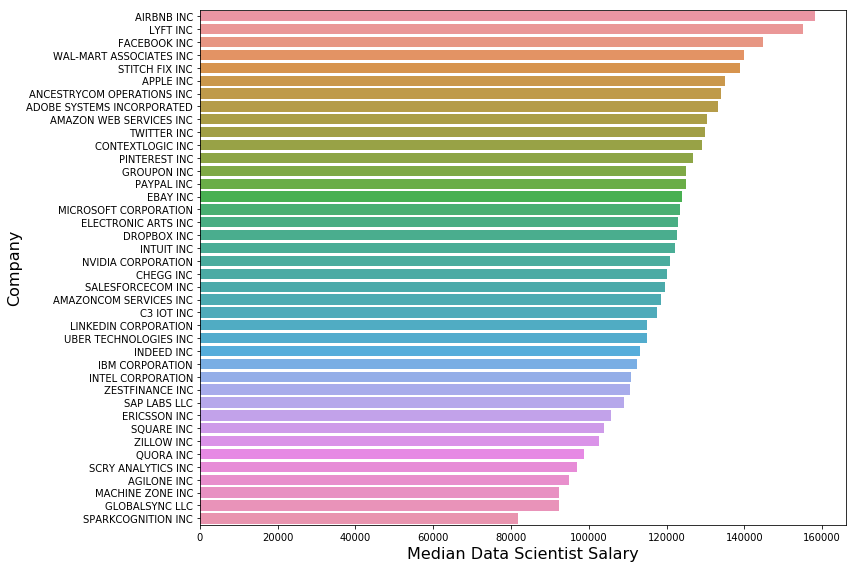

In [116]:
company_df = pd.DataFrame()
company_df['company'] = ds_jobs_df[['company','salary']].groupby(by=['company']).count().reset_index()['company']
company_df['count'] = ds_jobs_df[['company','salary']].groupby(by=['company']).count().reset_index()['salary']
company_df['salary'] = ds_jobs_df[['company','salary']].groupby(by=['company']).median().reset_index()['salary']
sorted_df = company_df.sort_values(by='salary', ascending=False)
sorted_df= sorted_df[sorted_df['count']>=10]

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=sorted_df['salary'], 
                 y=sorted_df['company'])
ax.set_xlabel("Median Data Scientist Salary",fontsize=16)
ax.set_ylabel("Company",fontsize=16)
plt.tight_layout()
plt.savefig(fname='company_median_salary', dpi=150)

In [118]:
sorted_df.iloc[0:10]

,company,count,salary
25,AIRBNB INC,94,158255.0
345,LYFT INC,44,155000.0
219,FACEBOOK INC,293,144787.0
626,WAL-MART ASSOCIATES INC,64,140000.0
534,STITCH FIX INC,27,139000.0
58,APPLE INC,37,135000.0
51,ANCESTRYCOM OPERATIONS INC,10,134000.0
16,ADOBE SYSTEMS INCORPORATED,15,133099.0
45,AMAZON WEB SERVICES INC,10,130500.0
590,TWITTER INC,10,130000.0


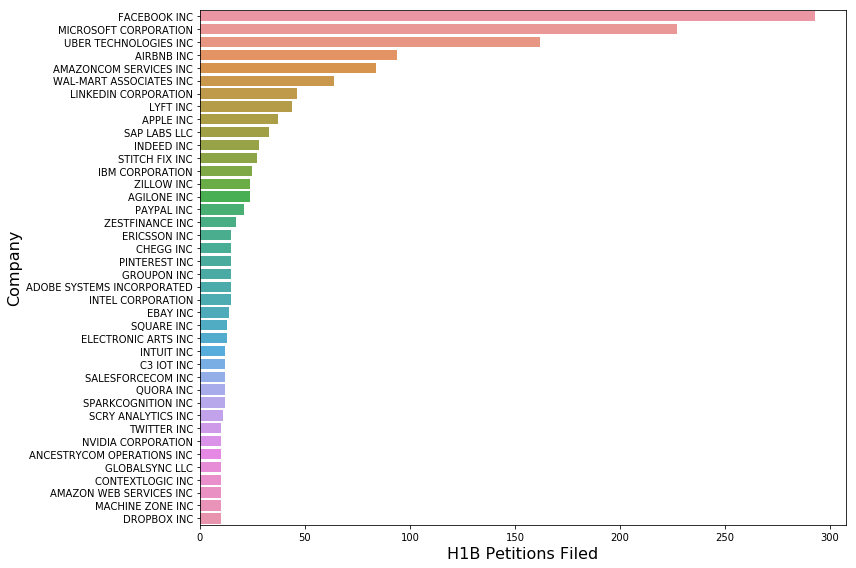

In [115]:
sorted_df = company_df.sort_values(by='count', ascending=False)
sorted_df= sorted_df[sorted_df['count']>=10]

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=sorted_df['count'], 
                 y=sorted_df['company'])
ax.set_xlabel("H1B Petitions Filed",fontsize=16)
ax.set_ylabel("Company",fontsize=16)
plt.tight_layout()
plt.savefig(fname='company_hired', dpi=150)

In [32]:
# Compare Big Tech to Everyone Else

In [34]:
# Compare Bay Area to Everyone Else both in numbers of jobs and salaries (signs of outsourcing to other states?)